In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["xtick.minor.visible"] = True 
plt.rcParams["ytick.minor.visible"] = True 

In [3]:
#Data Operations

####################################################################################
# Data from Files
def GetData1(filename):
    data = np.loadtxt(filename, comments='#')
    x = data[:,0]
    y = data[:,3]
    err = data[:,4]
    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(data[:,3],data[-1,3])

    return x, y, err, xstep, ystep

def GetData2(filename1,filename2):
    x1, y1, err1, xstep1, ystep1 = GetData1(filename1)
    x2, y2, err2, xstep2, ystep2 = GetData1(filename2)
    x = x1
    y = 0.5*(y1+y2)
    err = 0.5*np.sqrt(err1*err1+err2*err2)
    xstep = xstep1
    ystep = 0.5*(ystep1+ystep2)
    return x, y, err, xstep, ystep

def GetExpData(filename):
    data = np.loadtxt(filename, comments='#')
    x = data[:,0]
    y = data[:,3]
    err = data[:,4]
    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(data[:,3],data[-1,3])
    sysp = np.append(data[:,6],data[-1,6])
    sysm = -sysp
    #print(len(data[0,:]))
    if len(data[0,:]) > 7:
        sysm = np.append(data[:,7],data[-1,7])
    return x, y, err, xstep, ystep, sysp, sysm

def GetDataRatio(x1, y1, err1, xstep1, ystep1, x2, y2, err2, xstep2, ystep2):
    x = x1
    y, err = RatioError(y1, err1, y2, err2)
    xstep = xstep1
    ystep = ystep1/ystep2
    return x, y, err, xstep, ystep

####################################################################################
# Errors
def RatioError(y1, err1, y2, err2):
    return y1/y2, np.sqrt( (err1/y2)*(err1/y2) + (y1*err2/y2/y2)*(y1*err2/y2/y2) )

def ProdError(y1, err1, y2, err2):
    return y1*y2, np.sqrt( y2*y2*err1*err1 + y1*y1*err2*err2 )

def SumError(y1, err1, y2, err2, pm=1.):
    return y1 + pm*y2, np.sqrt( err1*err1 + err2*err2 )
####################################################################################
# Integration
def GetData1Integrate(filename,bin=0):
    data = np.loadtxt(filename, comments='#')
    x = data[:,0]

    dx = 1.0
    if bin == 1:
      dx = data[:,2] - data[:,1]
    
    y = data[:,3]*dx
    err = data[:,4]*dx
    err2 = err*err

    for i in range(1,len(y)):
      y[i]=y[i-1]+y[i]
      err2[i]=err2[i-1]+err2[i]

    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(y[:],y[-1])
    err = np.sqrt(err2)

    return x, y, err, xstep, ystep

In [4]:
def CombineLast2Bins(x, y, err, xstep, ystep):
  ###############
  # Bin
  xstep[-2] = xstep[-1]
  x[-2] = 0.5*(x[-2]+x[-1])
  y[-2], err[-2] = SumError(y[-2], err[-2], y[-1], err[-1])
  y[-2] = 0.5*y[-2]
  err[-2] = 0.5*err[-2]
  #####
  ystep[-3] = 0.5*(ystep[-3]+ystep[-2])
  ystep[-2] = ystep[-3]
  #####
  x = x[:-1]
  y = y[:-1]
  err = err[:-1]
  xstep = xstep[:-1]
  ystep = ystep[:-1]
  ###############
  return x, y, err, xstep, ystep


# 30-50%, $R=0.2$, $60$-$80$ GeV/$c$

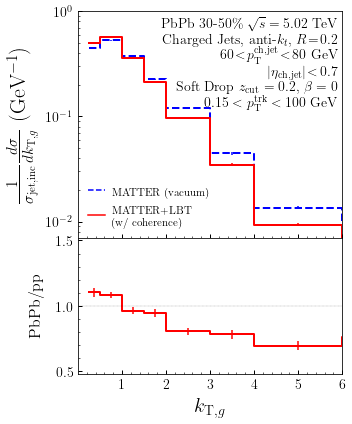

In [60]:
fig, axs = plt.subplots(2, 1, figsize=(5, 6), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0,'height_ratios': (5,3)})
axt, axb  = axs


###############
# EXP
# exp_data = ''
# x_e, y_e, err_e, xstep_e, ystep_e, sysp_e, sysm_e = GetExpData(exp_data)
# epoints = axt.errorbar(x_e, y_e, yerr=err_e, label='test', marker="o", linestyle="none", color = 'black',markersize=8)
# esys = axt.fill_between(xstep_e, ystep_e+sysp_e, ystep_e+sysm_e, step='post', color='gray', alpha=0.15)
###############
# THEORY
theory_data = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_30-50/PP/SoftDropGroom_hist_total_SoftDropGroom_ktG_jetr0.2_ptj60-80_rapj0.0-0.7_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
x_t, y_t, err_t, xstep_t, ystep_t = GetData1(theory_data)
###########
x_t = x_t[1:]
y_t = y_t[1:]
err_t = err_t[1:]
xstep_t = xstep_t[1:]
ystep_t = ystep_t[1:]
###########
axt.step(xstep_t, ystep_t, where='post', color='blue',linestyle='dashed', linewidth = 2)
axt.errorbar(x_t, y_t, err_t, marker="", linestyle="none", color='blue')
tcurve = axt.errorbar(0, 0, color='blue',linestyle='dashed')
###############

###############
# THEORY
theory1_1_data = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_30-50/matter_lbt_full_pbpb_30-40/SoftDropGroom_hist_total_SoftDropGroom_ktG_jetr0.2_ptj60-80_rapj0.0-0.7_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
theory1_2_data = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_30-50/matter_lbt_full_pbpb_40-50/SoftDropGroom_hist_total_SoftDropGroom_ktG_jetr0.2_ptj60-80_rapj0.0-0.7_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetData2(theory1_1_data,theory1_2_data)
###########
x_t1 = x_t1[1:]
y_t1 = y_t1[1:]
err_t1 = err_t1[1:]
xstep_t1 = xstep_t1[1:]
ystep_t1 = ystep_t1[1:]
###########
axt.step(xstep_t1, ystep_t1, where='post', color='red',linestyle='solid', linewidth = 2)
axt.errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color='red')
tcurve1 = axt.errorbar(0, 0, color='red',linestyle='solid')
###############


x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetDataRatio(x_t1, y_t1, err_t1, xstep_t1, ystep_t1, x_t, y_t, err_t, xstep_t, ystep_t)
axb.step(xstep_t1, ystep_t1, where='post', color='red',linestyle='solid', linewidth = 2)
axb.errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color='red')


###############
for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$k_{\mathrm{T},g}$', fontsize=20, labelpad=6)
    ax.set_xticks([1,2,3,4,5,6])
    ax.set_xlim(0,6)    
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.label_outer()

axt.set_yscale('log')
# ######
axt.set_ylim(0.007,1) 
axb.set_ylim(0.48,1.52) 
axt.set_ylabel(r'$\frac{1}{\sigma_{\mathrm{jet,inc}}}\frac{d\sigma}{d k_{\mathrm{T},g}}$ (GeV$^{-1}$)', fontsize=22, labelpad=8)
axb.set_ylabel(r'PbPb/pp', fontsize=16, labelpad=12)
axb.axhline(1, color = "black", linewidth=0.3, linestyle='dotted')
# ######
axt.text(5.9, 0.7, r'PbPb 30-50\% $\sqrt{s} = 5.02$ TeV', fontsize = 14, ha = 'right')
axt.text(5.9, 0.7*(10**(-0.15)), r'Charged Jets, anti-$k_t$, $R\!=\!0.2$', fontsize = 14, ha = 'right')
axt.text(5.9, 0.7*(10**(-0.15*2)), r'$60\!<\!p_{\mathrm{T}}^{\mathrm{ch,jet}}\!<\!80$ GeV', fontsize = 14, ha = 'right')
axt.text(5.9, 0.7*(10**(-0.15*3)), r'$|\eta_{\mathrm{ch,jet}}|\!<\!0.7$', fontsize = 14, ha = 'right')
axt.text(5.9, 0.7*(10**(-0.15*4)), r'Soft Drop $z_{\mathrm{cut}}=0.2$, $\beta=0$', fontsize = 14, ha = 'right')
axt.text(5.9, 0.7*(10**(-0.15*5)),  r'$0.15<p^{\mathrm{trk}}_{\mathrm{T}}<100$ GeV', fontsize = 14, ha = 'right')

handles = [tcurve,tcurve1]
labels = ['MATTER (vacuum)', 'MATTER+LBT\n(w/ coherence)']

axt.legend(handles,labels,ncol=1,loc='lower left',edgecolor='none', frameon=True, facecolor='none', handletextpad=0.6, handleheight=1.8, labelspacing=0.5, bbox_to_anchor=(0, 0), borderaxespad=0.5, handlelength=1.6, fontsize=11)

## Generate PDF File
plt.tight_layout()
plt.savefig('Plots/KG_SD_ALICE_30-50_R02.pdf')